In [1]:
from matplotlib import pyplot as plt
from IPython.display import display
import cv2
import numpy as np

In [5]:
from tensorflow.keras.layers import InputSpec
from keras import activations, initializers, regularizers, constraints

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import load_model
#from keras.layers import Activations

In [178]:
img = cv2.imread('2-2_mediumthin.png')

In [179]:
def DataExtractionMathClass(img):
    max_lowThreshold = 100
    window_name = 'Edge Map'
    title_trackbar = 'Min Threshold:'
    ratio = 3
    kernel_size = 3
    val = 100

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    low_threshold = val
    detected_edges = cv2.Canny(gray, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = img * (mask[:,:,None].astype(img.dtype))

    is_a_number = 0
    is_in_middle = 0

    top_r = 10000
    bot_r = 0
    prev_c = 0

    height = img.shape[0]
    width = img.shape[1]

    padding_r = 0
    padding_c = 0
    sign = 'plus'

    symbol = 0
    components = []

    np.savetxt('text.txt',detected_edges,fmt='%.2f')


    for column in range(0, width):
        is_in_middle = 0
        for row in range(0, height):
            if (detected_edges[row, column] > 30):
                is_in_middle = 1
                if row > bot_r:
                    bot_r = row
                if row < top_r:
                    top_r = row


        if (is_in_middle == 1 and is_a_number == 0):
            #print("number found!")
            is_a_number = 1       
            prev_c = column

        if is_in_middle == 0 and is_a_number == 1:
            #print("number end")
            if (column - prev_c > bot_r - top_r):
                padding_r = (int) (((column - prev_c) - (bot_r - top_r)) / 2)
            else:
                padding_c = (int) (((bot_r - top_r) - (column - prev_c)) / 2)

            padding_c += 20
            padding_r += 20
            symbol += 1
            #img = cv2.rectangle(img,(prev_c - padding_c, top_r - padding_r),(column + padding_c, bot_r + padding_r),(255,0,0),5)
            is_a_number = 0

            components.append(img[top_r - padding_r:bot_r + padding_r, prev_c - padding_c:column + padding_c])

            # save boundaries for +/- Classification 
            if(symbol == 2):
                leftC = prev_c
                rightC = column
                bottomR = bot_r
                topR = top_r

                # +/- DETECTION USING CANNY EDGES 
                colDim = rightC - leftC
                rowDim = topR - bottomR

                ratio = abs(colDim) /abs(rowDim) 
                if (ratio > 2.5):
                    sign = 'minus'

            top_r, bot_r, padding_c, padding_r = 10000, 0, 0, 0

    components[1] = sign
    return components[0],components[1],components[2]


In [180]:
def predictNumber(img):
    model = load_model("Model_3conv.h5", custom_objects = {'softmax_v2': tf.nn.softmax})

    # format image for square sizing
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    squareGray = imgGray #imgGray[1000:3500, 0:2500] #square size depends on img but worked for all sample images
    resizedSquare = cv2.resize(squareGray, (28, 28), interpolation=cv2.INTER_AREA)

    #format for keras
    squareAsArray = resizedSquare.reshape(28, 28, 1)
    squareAsArray = squareAsArray.astype('float32')

    #make black number with white background
    squareAsArray[squareAsArray <= 180.] = 255.
    squareAsArray[squareAsArray < 255.] = 0.

    #format for keras (again)
    squareAsArray /= 255
    predictionImage = squareAsArray.reshape(1, 28, 28, 1)
    
    #visualize image if needed:
    #plt.imshow(predictionImage.reshape(28,28), cmap = "Greys")

    pred = model.predict(predictionImage)
    
    return pred.argmax()


In [181]:
def solveEquation(first,sign,second):
    final = 0
    first_No = predictNumber(first)
    second_No = predictNumber(second)
    
    if(sign=='plus'):
        final = first_No+second_No
    if(sign=='minus'):
        final = first_No-second_No
    return first_No,second_No,final

In [182]:
first,sign,second = DataExtractionMathClass(img)

In [183]:
first_No,second_No,answer = solveEquation(first,sign,second)

In [184]:
print(first_No,sign,second_No,"=",answer)

2 minus 2 = 0


2


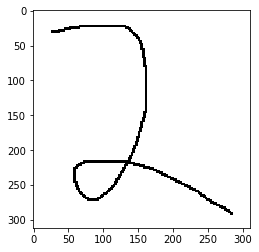

In [185]:
plt.imshow(second)
print(predictNumber(second))
plt.show()

3

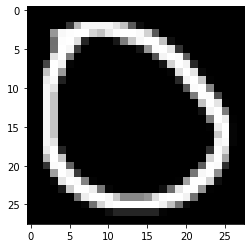

In [174]:
model = load_model("Model_3conv.h5", custom_objects = {'softmax_v2': tf.nn.softmax})
%matplotlib inline

img = second
# format image for square sizing
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
squareGray = imgGray #imgGray[1000:3500, 0:2500] #square size depends on img but worked for all sample images
resizedSquare = cv2.resize(squareGray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(resizedSquare, cmap = "Greys")

#format for keras
squareAsArray = resizedSquare.reshape(28, 28, 1)
squareAsArray = squareAsArray.astype('float32')

#make black number with white background
squareAsArray[squareAsArray >= 180.] = 0.
squareAsArray[squareAsArray > 0.] = 255.
#plt.imshow(squareAsArray.reshape(28,28), cmap = "Greys")

#format for keras (again)
squareAsArray /= 255
predictionImage = squareAsArray.reshape(1, 28, 28, 1)

#visualize image if needed:
#plt.imshow(predictionImage.reshape(28,28), cmap = "Greys")

pred = model.predict(predictionImage)

pred.argmax()

In [89]:
ls

0+1_thick.png
0-0_medium.png
0-3_thin.png
1+3_thin.png
1+8_medium.png
1+9_medium.png
1-7_thin.png
2+7_thick.png
2-1_medium.png
2-2_mediumthin.png
3+2_thin.png
3-1_medium.png
4+2_medium.png
4+2_thin.png
4+2_thin2.png
4+6_thin.png
4-2_medium.png
4-6_thick.png
5-0_thin.png
5-3_medium.png
7-3_medium.png
7-4medium.png
8+2_thickmessy.png
8-2_thin.png
8-3_thin.png
8-4_medium.png
8-8_thin.png
9+9_medium.png
9-1_medium.png
9-3_thin.png
Bounding Boxes.ipynb
CNN.py
Equation_pre-processing _ add on.ipynb
Equation_pre-processing.ipynb
Final Proj.ipynb
Model_3conv.h5
README.md
Screen Shot 2020-01-10 at 4.36.45 PM.png
Screen Shot 2020-01-10 at 4.36.48 PM.png
Screen Shot 2020-01-10 at 4.36.51 PM.png
Screen Shot 2020-01-10 at 4.38.35 PM.png
Screen Shot 2020-01-10 at 4.38.46 PM.png
Screen Shot 2020-01-10 at 4.39.29 PM.png
Screen Shot 2020-01-10 at 4.39.32 PM.png
predictNumber.py
text.txt
